# Preprocessing Spain's Energy Data for Time Series Modeling

## Prepare Notebook

**Read in libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import warnings

**Set Notebook Preferences**

In [2]:
#Set Pandas preferenes
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

#Set style for matplotlib
plt.style.use('seaborn-deep')

#Surpress annoying warnings
warnings.filterwarnings('ignore')

#Set path to save visualizations created in this notebook
viz_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Visualizations\02_Data_Processing'

#Set path to read in visuals from EDA
eda_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Visualizations\01_Exploratory_Data_Analysis'

**Read in data**

In [3]:
#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Data\02_Cleaned_Data'

#Read in file
df = pd.read_csv(path + '/2020_0620_Weather_Energy.csv', index_col=0)

**Preview Data**

In [4]:
print('Data shape:',df.shape)
display(df.head())

Data shape: (35070, 17)


,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,price actual,temp,total load actual
date_time,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,65.41,30.814633,25385.0
2015-01-01 01:00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,64.92,30.852860,24382.0
2015-01-01 02:00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,64.48,30.108448,22734.0
2015-01-01 03:00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,59.32,30.091044,21286.0
2015-01-01 04:00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,56.04,30.192620,20264.0


## Correlation Matrix

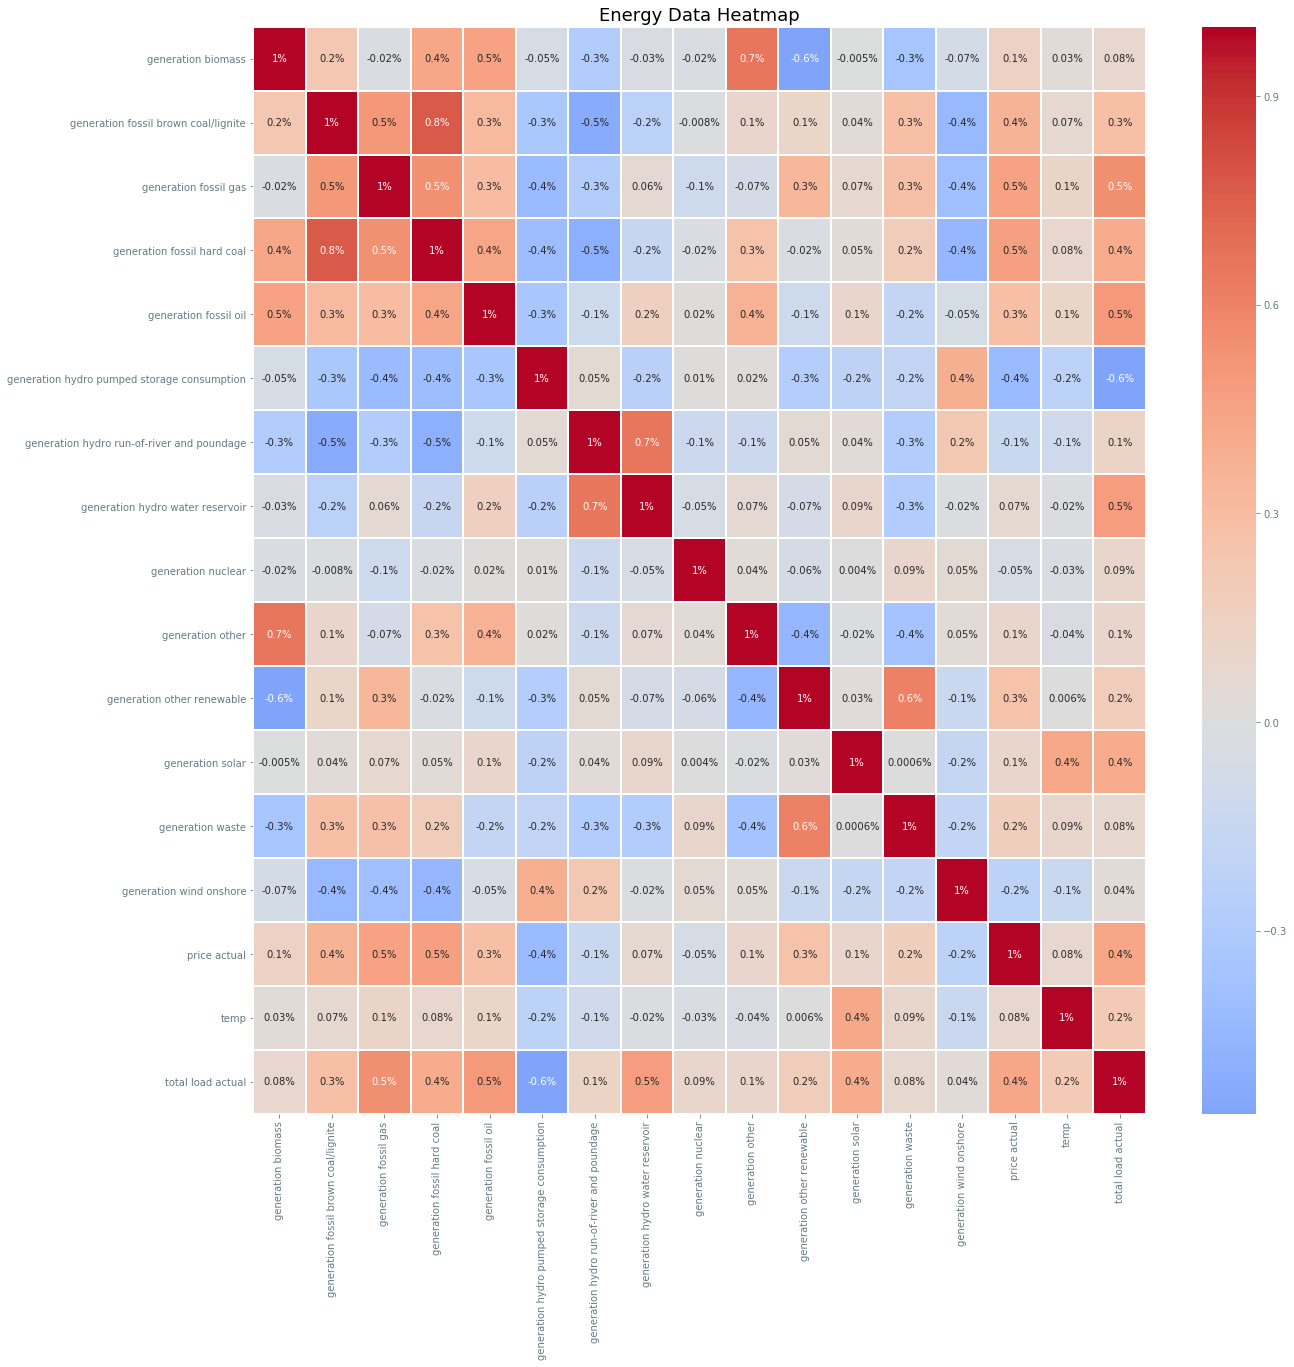

In [5]:
Image(filename= eda_path + '/Correlation_Matrix.png', height=1300, width=1300)

**Dropping cols with <.4 and >-.4 correlation with target**

In [6]:
#Create corr
corr = df.corr()

#Capture features with a strong corr w/ target
features = corr['price actual'][(corr['price actual'] < -.4 )| (corr['price actual'] > .4 )].index
df = df[features]

#Check
df.head()

,generation fossil gas,generation fossil hard coal,generation hydro pumped storage consumption,price actual,total load actual
date_time,,,,,
2015-01-01 00:00:00,4844.0,4821.0,863.0,65.41,25385.0
2015-01-01 01:00:00,5196.0,4755.0,920.0,64.92,24382.0
2015-01-01 02:00:00,4857.0,4581.0,1164.0,64.48,22734.0
2015-01-01 03:00:00,4314.0,4131.0,1503.0,59.32,21286.0
2015-01-01 04:00:00,4130.0,3840.0,1826.0,56.04,20264.0


## Check for Stationarity

**ADF and KPSS Test**

In [7]:
# #Read in ADF and KPSS tests
# from Time_Series_Tests import ADF_KPSS_test

# #Apply tests to each timeseries in data 
# for col in df.columns:
#     print('Results for {}\n'.format(str.title(col)))
#     ADF_KPSS_test(df[col],0)

**Log Transformation of Price**

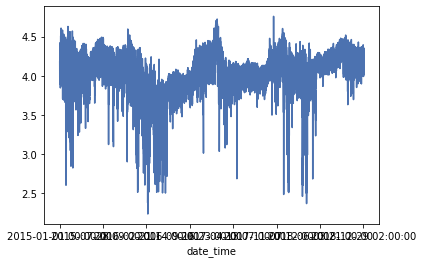

In [8]:
df['log_price_actual'] = np.log(df['price actual'])

df['log_price_actual'].plot()

**Check Autocorrelation Plots**

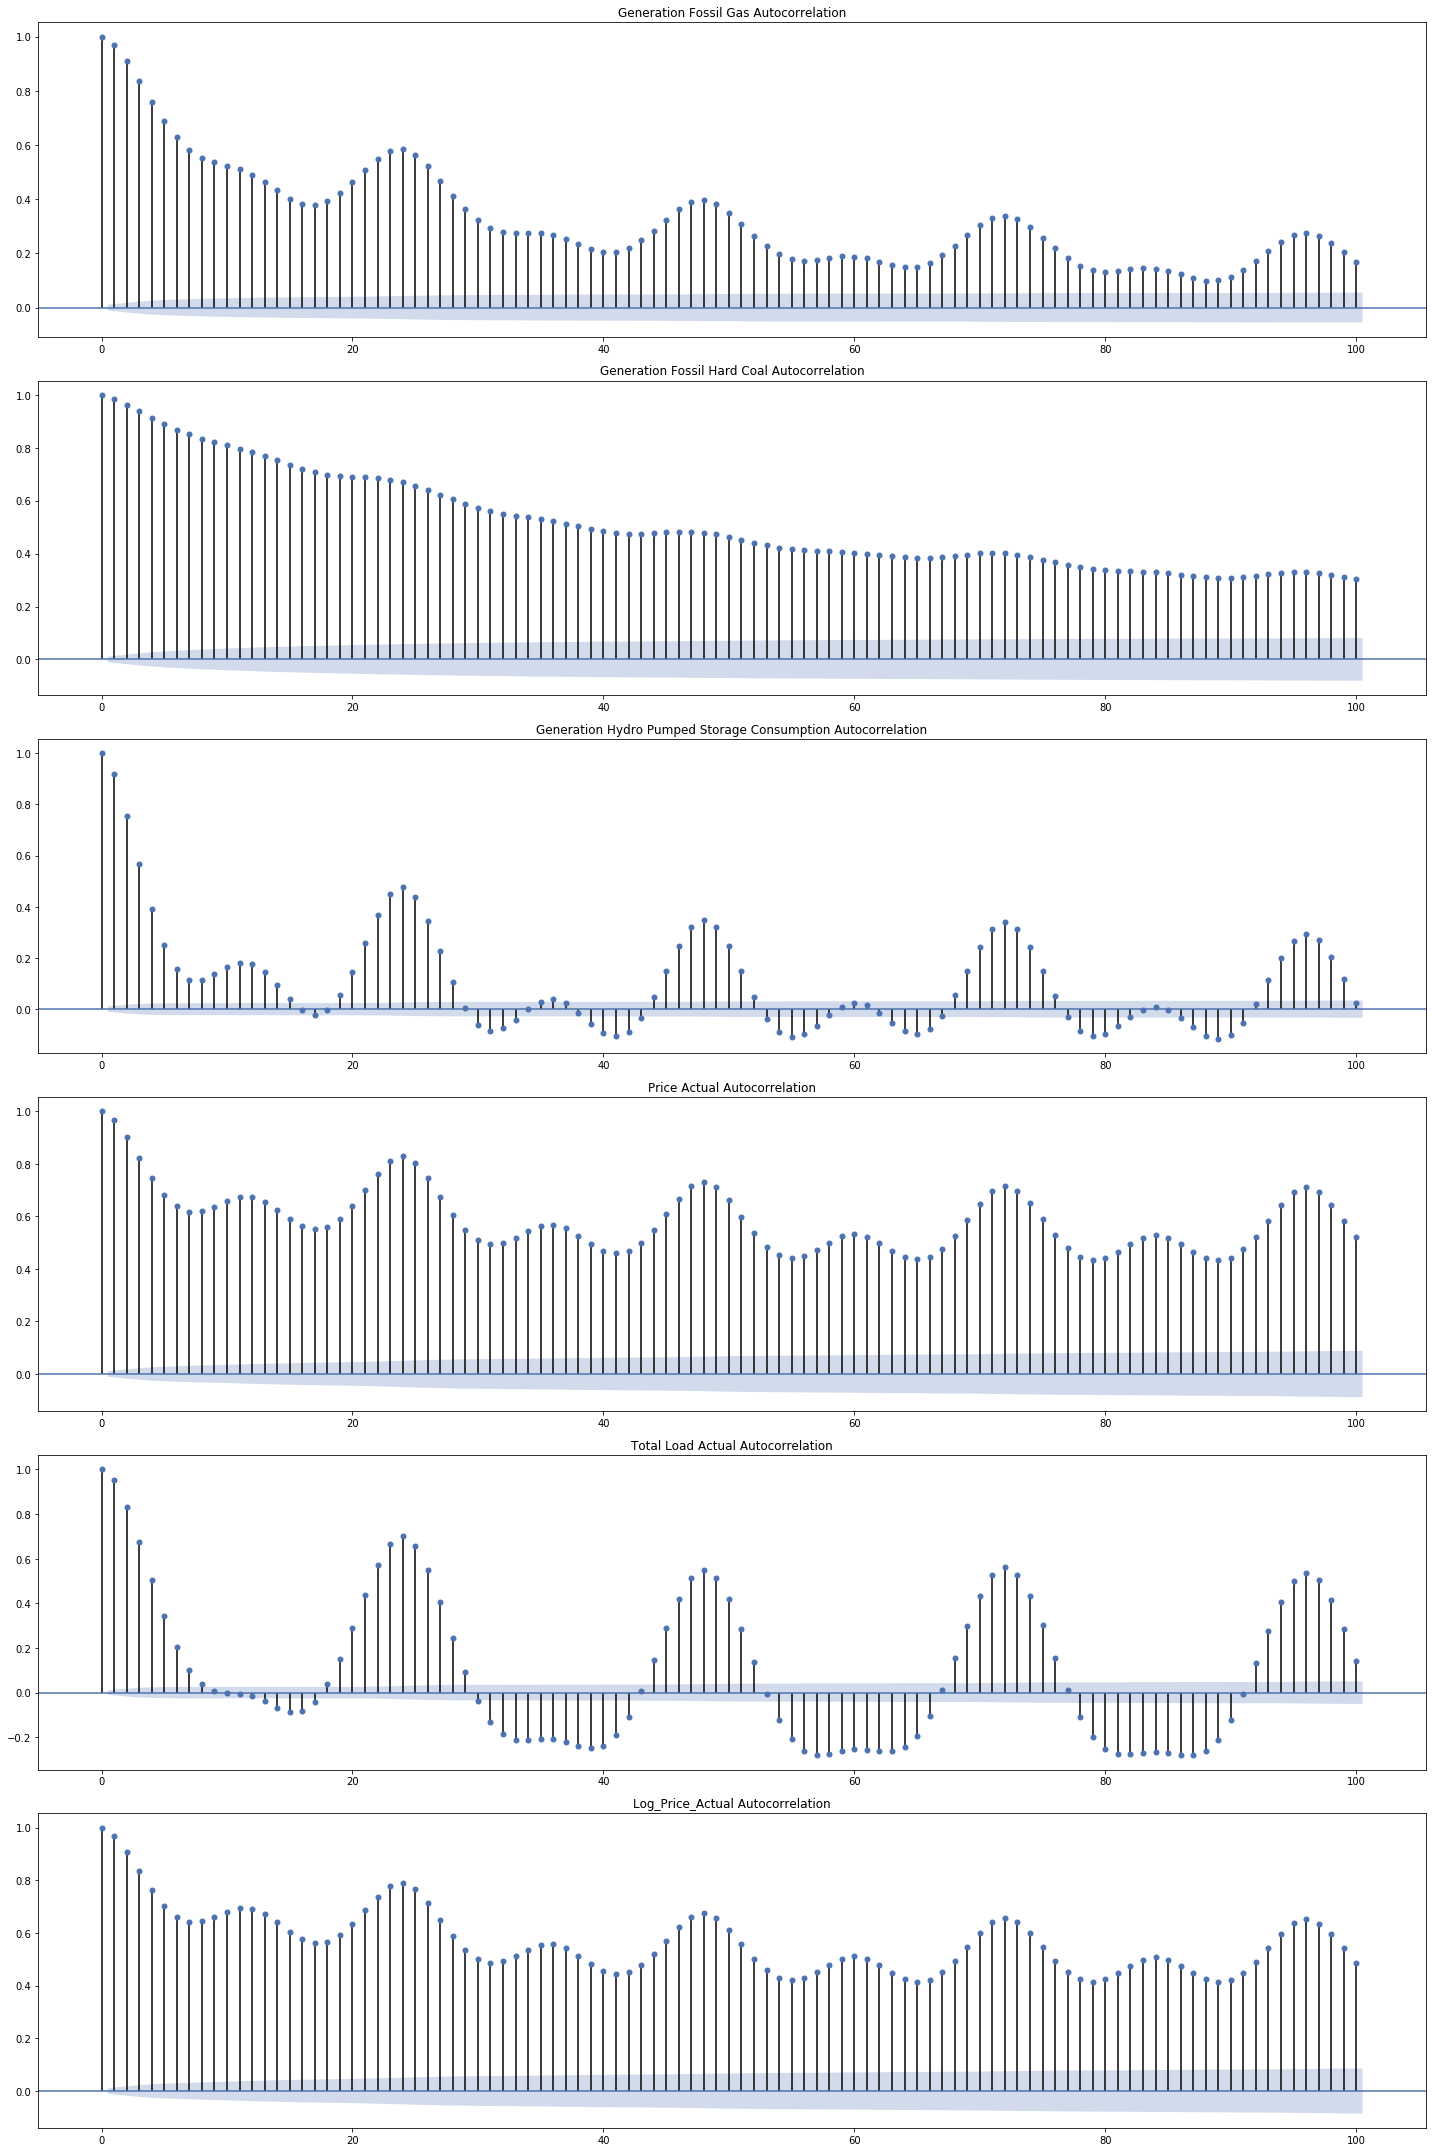

In [11]:
#Read in ACF and PACF PLots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Create figure
f, axes = plt.subplots(len(df.columns),1, figsize = (20,30))

#PLot ACF
for col, ax in zip(df.columns, axes.flat):
    plot_acf(df[col], lags = 100, ax = ax, title = str.title(col) + ' Autocorrelation')
    plt.tight_layout()


**Split data into training and test sets**

In [12]:
#Set cutoff to split data 85% train and 15% test
cutoff = round(len(df) *.85)

#Split data
X_train = df[:cutoff]
X_test = df[cutoff:]

#Check
print('Training data shape{} Test data shape: {}'.format(X_train.shape,X_test.shape))

Training data shape(29810, 6) Test data shape: (5260, 6)


**Apply first order differencing to training data**

In [13]:
#Loop appends a differenced col to X_train
for col in X_train.columns:
    X_train[col +' differenced'] = X_train[col] - X_train[col].shift(-1)

#Sort cols and dropna
X_train = X_train.reindex(sorted(X_train.columns), axis=1)
X_train.dropna(inplace=True)

#Check
display(X_train.head())

,generation fossil gas,generation fossil gas differenced,generation fossil hard coal,generation fossil hard coal differenced,generation hydro pumped storage consumption,generation hydro pumped storage consumption differenced,log_price_actual,log_price_actual differenced,price actual,price actual differenced,total load actual,total load actual differenced
date_time,,,,,,,,,,,,
2015-01-01 00:00:00,4844.0,-352.0,4821.0,66.0,863.0,-57.0,4.180675,0.007519,65.41,0.49,25385.0,1003.0
2015-01-01 01:00:00,5196.0,339.0,4755.0,174.0,920.0,-244.0,4.173156,0.006801,64.92,0.44,24382.0,1648.0
2015-01-01 02:00:00,4857.0,543.0,4581.0,450.0,1164.0,-339.0,4.166355,0.083409,64.48,5.16,22734.0,1448.0
2015-01-01 03:00:00,4314.0,184.0,4131.0,291.0,1503.0,-323.0,4.082947,0.056881,59.32,3.28,21286.0,1022.0
2015-01-01 04:00:00,4130.0,92.0,3840.0,250.0,1826.0,-283.0,4.026066,0.043957,56.04,2.41,20264.0,359.0


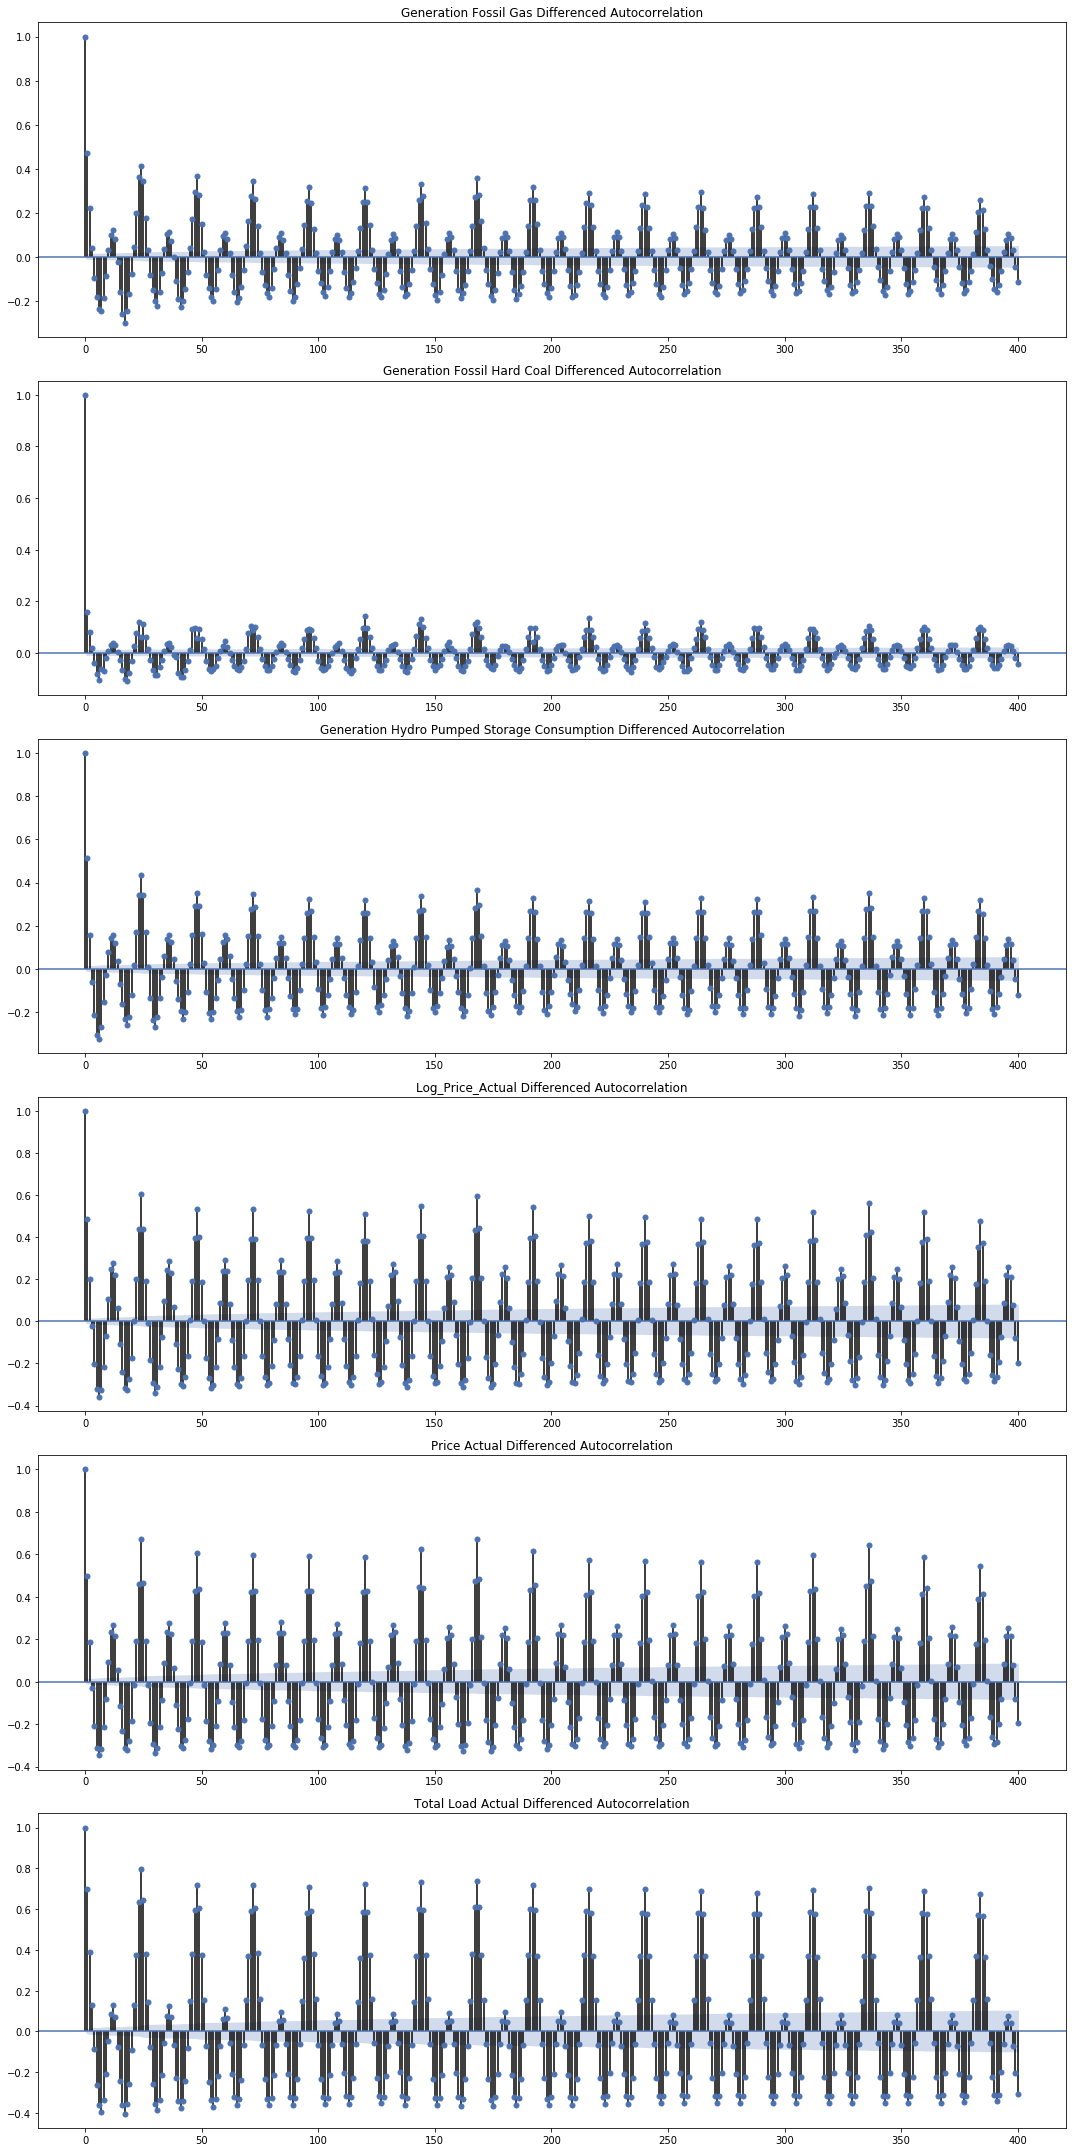

In [14]:
#Create figure
f, axes = plt.subplots(len(df.columns),1, figsize = (15,30))

#PLot ACF
for col, ax in zip(X_train.filter(regex = 'diff').columns, axes.flatten()):
    plot_acf(X_train[col], lags = 400, ax = ax, title = str.title(col) + ' Autocorrelation')
    plt.tight_layout()



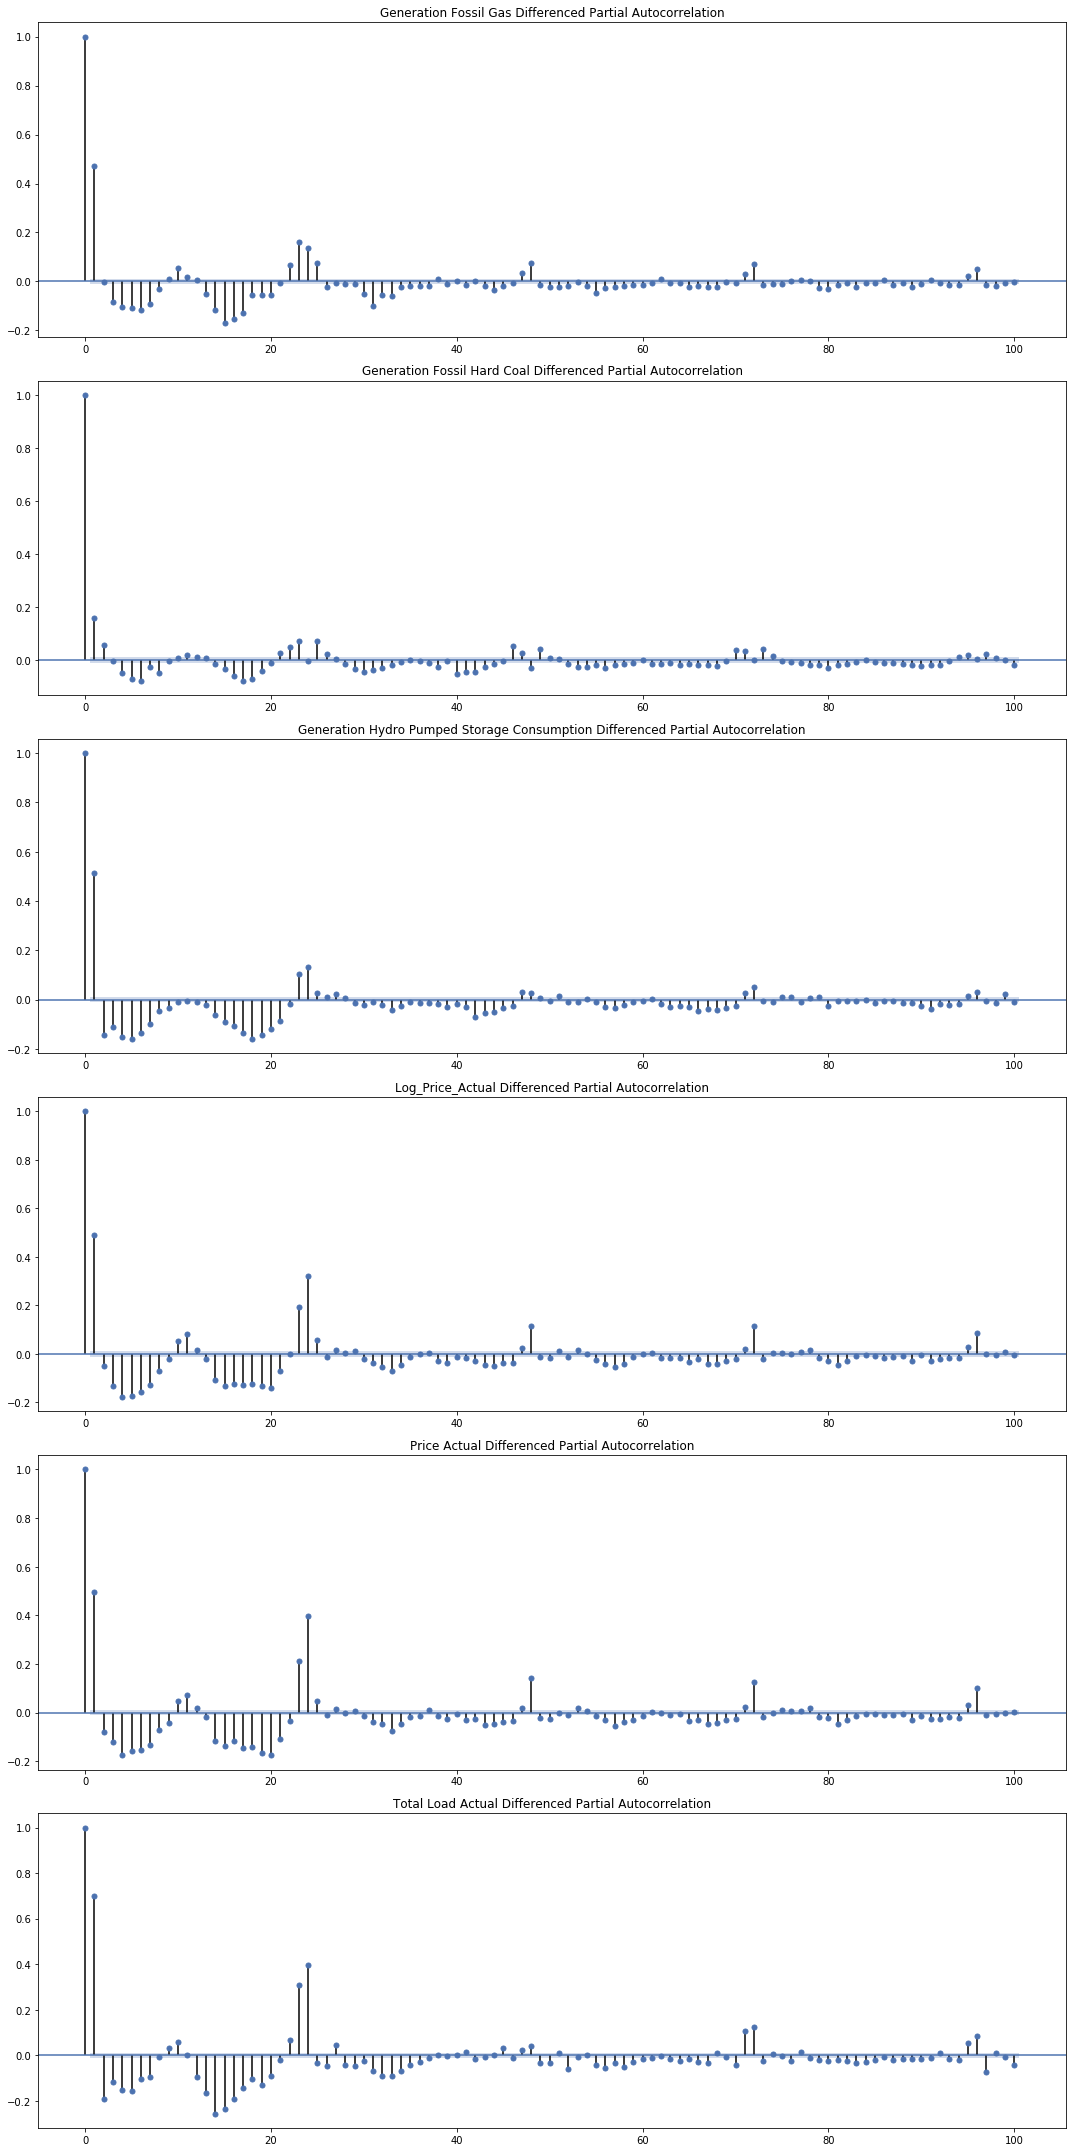

In [17]:
#Create figure
f, axes = plt.subplots(len(df.columns),1, figsize = (15,30))

#PLot PACF
for col, ax in zip(X_train.filter(regex = 'diff').columns, axes.flatten()):
    plot_pacf(X_train[col], lags = 100, ax = ax, title = str.title(col) + ' Partial Autocorrelation')
    plt.tight_layout()


**Prepare data for XGBoost**

In [40]:
#Create boosting df for univariate analysis
xg_df = pd.DataFrame(df['price actual'], )

xg_df.reset_index(inplace = True)
xg_df[['date','time']] = xg_df.date_time.str.split(' ', expand = True)

#Extract features from date
xg_df.date =pd.to_datetime(xg_df.date)
xg_df['year']=xg_df.date.dt.year
xg_df['month']=xg_df.date.dt.month_name()
xg_df['week_number_year']=xg_df.date.dt.week
xg_df
xg_df['weekday']=xg_df.date.dt.day_name()


#Check

display(xg_df.tail(100))

,date_time,price actual,date,time,year,month,week,weekday
34970,2018-12-27 20:00:00,78.99,2018-12-27,20:00:00,2018,December,52,Thursday
34971,2018-12-27 21:00:00,77.65,2018-12-27,21:00:00,2018,December,52,Thursday
34972,2018-12-27 22:00:00,73.28,2018-12-27,22:00:00,2018,December,52,Thursday
34973,2018-12-27 23:00:00,73.48,2018-12-27,23:00:00,2018,December,52,Thursday
34974,2018-12-28 00:00:00,70.93,2018-12-28,00:00:00,2018,December,52,Friday
34975,2018-12-28 01:00:00,68.61,2018-12-28,01:00:00,2018,December,52,Friday
34976,2018-12-28 02:00:00,64.19,2018-12-28,02:00:00,2018,December,52,Friday
34977,2018-12-28 03:00:00,62.53,2018-12-28,03:00:00,2018,December,52,Friday
34978,2018-12-28 04:00:00,59.78,2018-12-28,04:00:00,2018,December,52,Friday
34979,2018-12-28 05:00:00,59.82,2018-12-28,05:00:00,2018,December,52,Friday


# Export Data

In [16]:
#Set path location to write file
path = r'\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Data\03_Processed_Data'

#Write df
X_train.to_csv(path + '/2020_0624_Training_Data.csv')
X_test.to_csv(path + '/2020_0624_Test_Data.csv')